In [11]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from pcigale.sed import SED
from pcigale.sed import utils
from pcigale.sed_modules import get_module

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [20 , 10]

We want to study the absorption lines in the spectrum of G3

In [12]:
hdu_data = fits.open('Spectra\SDSS_spec_G3.fits')
spflux_data = hdu_data[0].data*1e-17
spwave_data = hdu_data[0].header['CRVAL1']+np.arange(hdu_data[0].header['NAXIS1'])*hdu_data[0].header['CDELT1'] 
redshift = hdu_data[0].header['REDSHIFT']
spwave_data = spwave_data/(1+redshift)

In [13]:
conversion_factor = (1e-5)**2 / (redshift*3e10/70e5)**2
conversion_factor

9.94310111119228e-15

## 1) Study of the $H_\beta$ line as a function of age

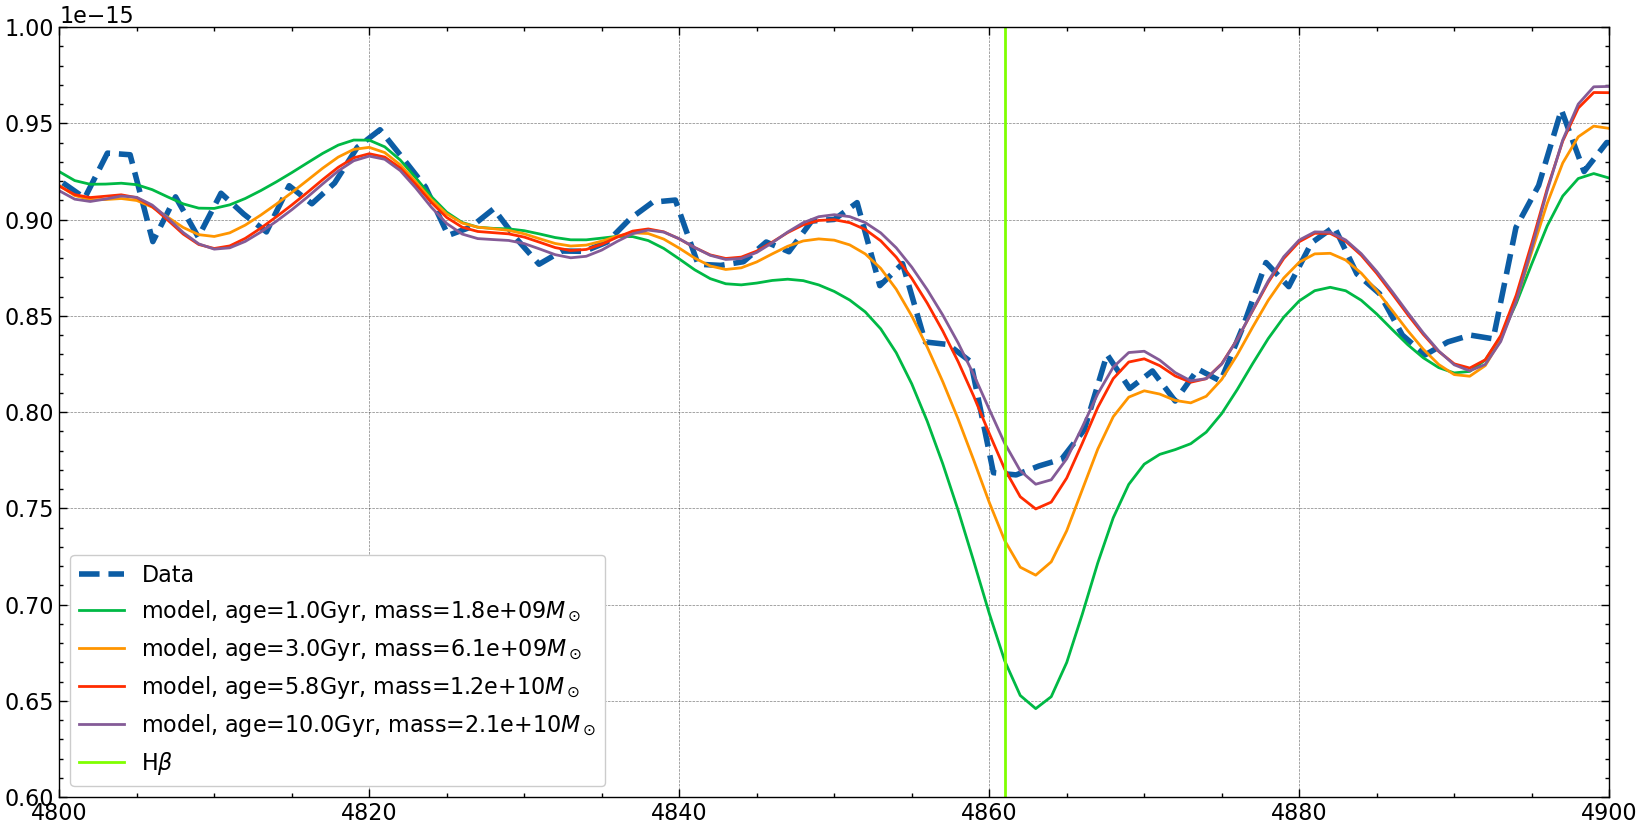

In [14]:
mass = np.array([1.85e9, 6.1e9, 1.25e10, 2.1e10])

plt.plot(spwave_data, spflux_data, ls='--', lw=4, label='Data')

for i in [1, 2, 3, 4]:
    hdu_model = fits.open('HR_Spectra\CIGALE_SSP_HR.fits')
    spwave_model = hdu_model[i].header['CRVAL1']+np.arange(hdu_model[i].header['NAXIS1'])*hdu_model[i].header['CDELT1'] 
    spflux_model = hdu_model[i].data*conversion_factor*mass[i-1]
    age_model = hdu_model[i].header['AGE']
    plt.plot(spwave_model, spflux_model, label=f'model, age={age_model/1000}Gyr, mass={mass[i-1]:.1e}$M_\odot$')

plt.axvline(4861, label='H$\\beta$', color='chartreuse')
plt.xlim(4800, 4900)
plt.ylim(0.6e-15, 1.e-15)
plt.legend()

The data is consistent with an old galaxy of 5.8 - 10 Gyr.

## 2) Study of the $H_\delta$ line as a function of age

We have to slightly adjust the masses

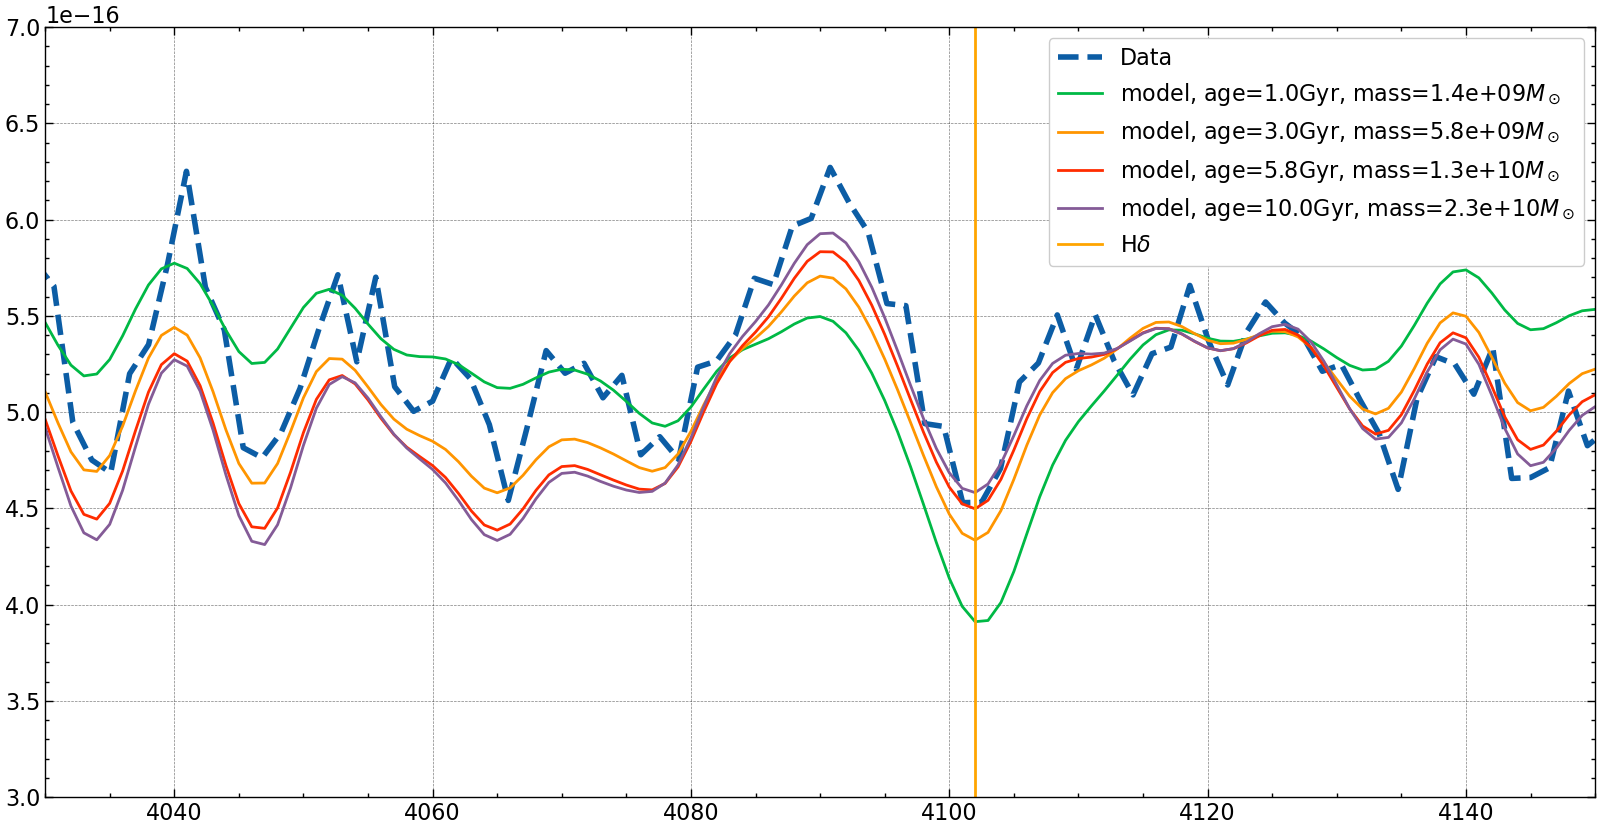

In [31]:
mass = np.array([1.43e9, 5.75e9, 1.28e10, 2.3e10])

plt.plot(spwave_data, spflux_data, ls='--', lw=4, label='Data')

for i in [1, 2, 3, 4]:
    hdu_model = fits.open('HR_Spectra\CIGALE_SSP_HR.fits')
    spwave_model = hdu_model[i].header['CRVAL1']+np.arange(hdu_model[i].header['NAXIS1'])*hdu_model[i].header['CDELT1'] 
    spflux_model = hdu_model[i].data*conversion_factor*mass[i-1]
    age_model = hdu_model[i].header['AGE']
    plt.plot(spwave_model, spflux_model, label=f'model, age={age_model/1000}Gyr, mass={mass[i-1]:.1e}$M_\odot$')

plt.axvline(4102, label='H$\\delta$', color='orange')
plt.xlim(4030, 4150)
plt.ylim(0.3e-15, 0.7e-15)
plt.legend()

The older models are, once again, more similar to the data.